In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
df_cp = df

In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df.shape

(299, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
df[df.isnull()].sum()

age                         0.0
anaemia                     0.0
creatinine_phosphokinase    0.0
diabetes                    0.0
ejection_fraction           0.0
high_blood_pressure         0.0
platelets                   0.0
serum_creatinine            0.0
serum_sodium                0.0
sex                         0.0
smoking                     0.0
time                        0.0
DEATH_EVENT                 0.0
dtype: float64

In [8]:
df.DEATH_EVENT

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [9]:
df['age']

0      75.0
1      55.0
2      65.0
3      50.0
4      65.0
       ... 
294    62.0
295    55.0
296    45.0
297    45.0
298    50.0
Name: age, Length: 299, dtype: float64

In [10]:
age_data = df['age']

In [11]:
# What is the distribution of age among heart failure patients in the dataset
mean_age = age_data.mean()
mode_age = age_data.mode()
median_age = age_data.median()


Mean_age : 60.83389297658862
Mode_age : 0    60.0
Name: age, dtype: float64
median_age : 60.0


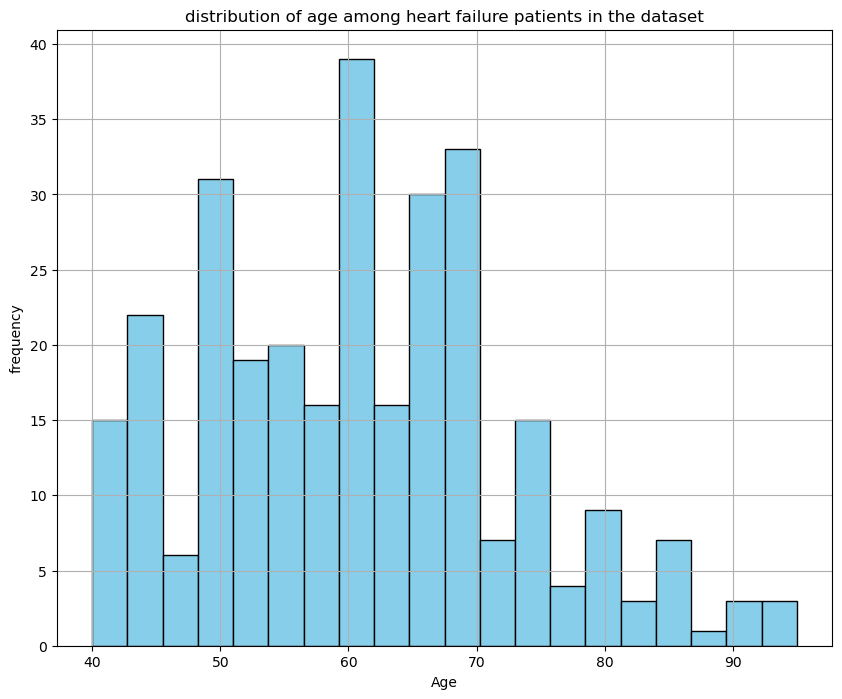

In [12]:
##visualization
print("Mean_age :",mean_age)
print("Mode_age :",mode_age)
print("median_age :",median_age)
plt.figure(figsize=(10,8))
plt.hist(age_data,bins = 20,color = 'skyblue',edgecolor = 'black')
plt.title('distribution of age among heart failure patients in the dataset')
plt.xlabel("Age")
plt.ylabel("frequency")
plt.grid(True)
plt.show()

##Insights are :
# 1) More number of people die in the age of 60
# 2) So More precosions take at this age of 60
# 3)Age of between 80 and 90 death rate is very less


In [13]:
## ´ How does the death rate vary with age

##Group this data by age and calculate death rate
age_death_rate = df.groupby('age')['DEATH_EVENT'].mean()

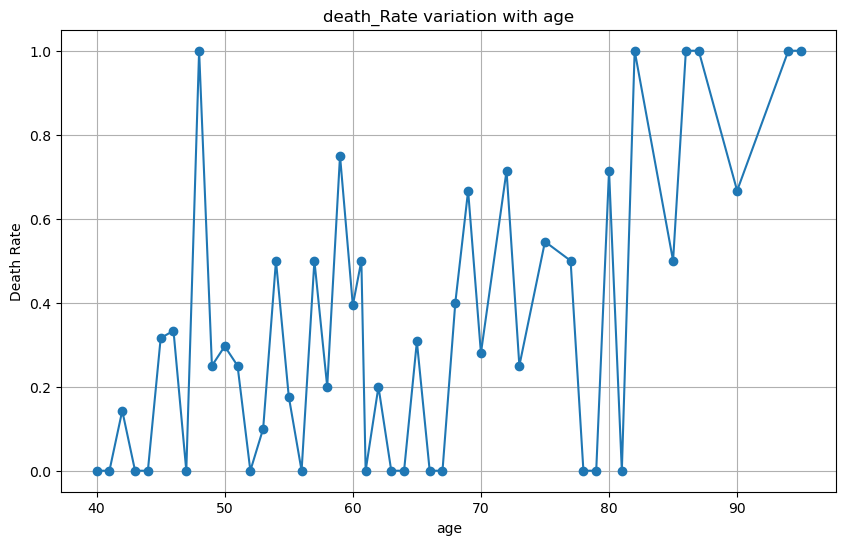

In [14]:
# Visualize this Group
plt.figure(figsize=(10,6))
plt.plot(age_death_rate.index,age_death_rate.values,marker = 'o',linestyle='-')
plt.title("death_Rate variation with age")
plt.xlabel("age")
plt.ylabel("Death Rate")
plt.grid(True)
plt.show()


<AxesSubplot: ylabel='sex'>

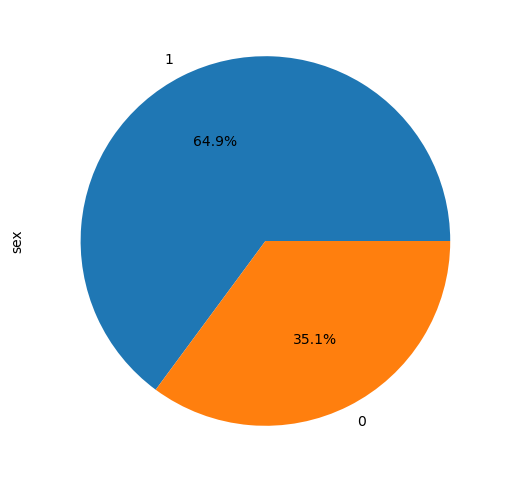

In [15]:
#What is the percentage of male and female patients in the dataset?
df["sex"].value_counts()
df["sex"].value_counts().plot.pie(y = df['sex'],autopct = '%1.1f%%',figsize = (6,6))
##Insights :
# 1) More heart atacks occure in males 

In [16]:
platelet_counts = df.groupby('age')['platelets'].mean()

           count           mean            std       min       25%  \
age_group                                                            
0-49        47.0  285931.705319  141518.402154   87000.0  222000.0   
50-59       82.0  265001.807073   83484.172827   70000.0  218250.0   
60-69       93.0  248990.840645   76019.870854   62000.0  204000.0   
70-79       52.0  267036.349038  101173.880709   25100.0  222250.0   
80-89       19.0  252248.213684  105430.556160   47000.0  189000.0   
90-100       6.0  290059.671667  109798.700540  196000.0  209500.0   

                  50%          75%       max  
age_group                                     
0-49       263358.030  326500.0000  850000.0  
50-59      263358.030  317750.0000  504000.0  
60-69      254000.000  286000.0000  497000.0  
70-79      259179.015  296000.0000  621000.0  
80-89      243000.000  313500.0000  507000.0  
90-100     244679.015  358339.5075  461000.0  


<Figure size 1000x600 with 0 Axes>

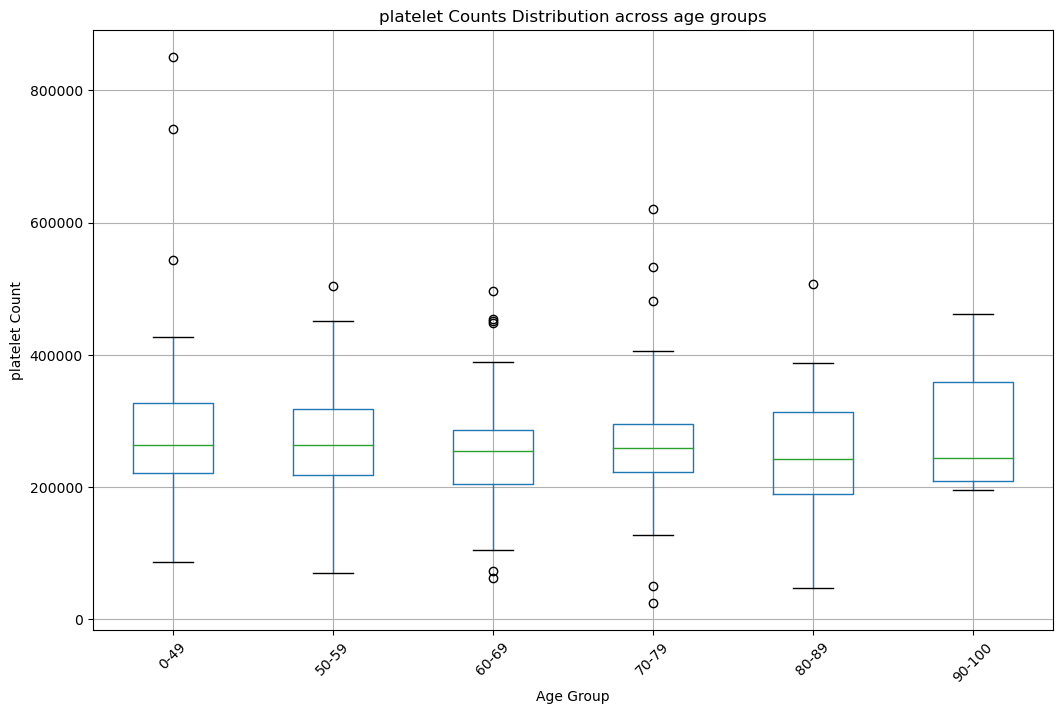

In [17]:
# How does the platelet count vary among different age groups
bins = [0,50,60,70,80,90,100]
labels = ['0-49','50-59','60-69','70-79','80-89','90-100']

df['age_group'] = pd.cut(df['age'],bins = bins,labels = labels,right = False)
platlet_summary = df.groupby('age_group')['platelets'].describe()

print(platlet_summary)

plt.figure(figsize=(10,6))
df.boxplot(column='platelets',by = 'age_group',figsize=(12,8))
plt.title("platelet Counts Distribution across age groups")
plt.xlabel("Age Group")
plt.ylabel("platelet Count")
plt.suptitle("")
plt.xticks(rotation = 45)
plt.show()

##Insights we can see that there are some outliers in all age groups 

In [18]:
# is there a correlation between creatinine and sodium levels in the blood


creatinine_levels = df['creatinine_phosphokinase']
sodium_levels = df['serum_sodium']

correlation_coefficient = creatinine_levels.corr(sodium_levels)

In [19]:
print('Correlation coefficient between creatinine and sodium levels :',correlation_coefficient)
##Insights : correlation Score is 59 it means there is some relations exist

Correlation coefficient between creatinine and sodium levels : 0.05955015583372577


In [20]:
# How does the prevalence of high blood presure differ between male and female patients

male_patients = df[df['sex'] == 1] ##Assume males are coded as 1
female_patients = df[df['sex'] == 0] ##Assume females are coded as 0 

male_bp_prevalence = (male_patients['high_blood_pressure']).mean()*100
female_bp_prevalence = (female_patients['high_blood_pressure']).mean()*100

In [21]:
print(f"Prevalence of High Blood Pressure among Male Patients:{male_bp_prevalence:.5f}")
print(f"Prevalence of High Blood Pressure among FeMale Patients:{female_bp_prevalence:.5f}")

Prevalence of High Blood Pressure among Male Patients:31.44330
Prevalence of High Blood Pressure among FeMale Patients:41.90476


In [22]:
df.high_blood_pressure

0      1
1      0
2      0
3      0
4      0
      ..
294    1
295    0
296    0
297    0
298    0
Name: high_blood_pressure, Length: 299, dtype: int64

In [23]:
##What is the relationship between smoking habits and the occurence of heart failure
smoking_habbits = df.groupby('smoking')['DEATH_EVENT'].mean()

print(smoking_habbits[0])
print(smoking_habbits[1])

0.3251231527093596
0.3125


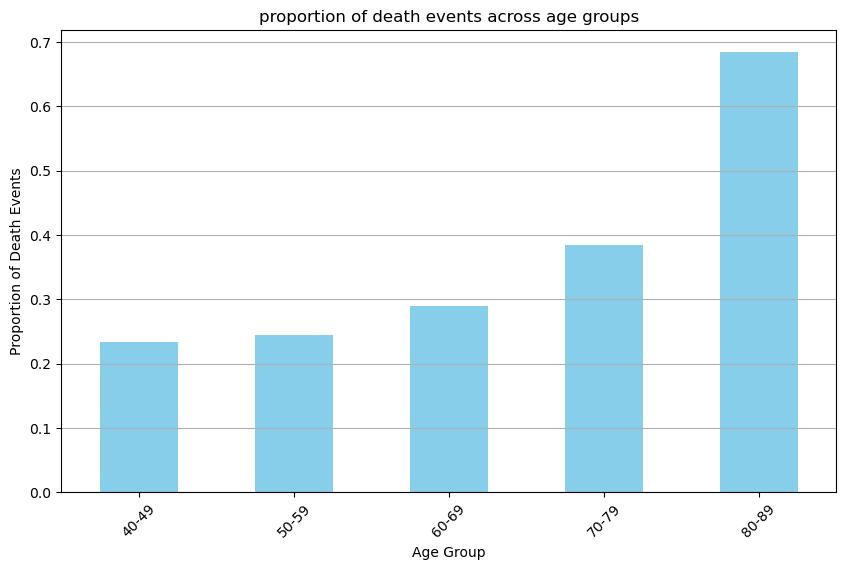

In [24]:
# Are there any noticeable patterns in the distribution of death events across different age groups ?
bins = [40, 50, 60, 70, 80, 90]  # Define age bins according to your dataset
labels = ['40-49', '50-59', '60-69', '70-79', '80-89']  # Labels for the age groups
df['age_group'] = pd.cut(df['age'],bins = bins ,labels= labels,right=False)
death_proposition_by_age = df.groupby('age_group')['DEATH_EVENT'].mean()

plt.figure(figsize=(10,6))
death_proposition_by_age.plot(kind = 'bar',color = 'skyblue')
plt.title('proportion of death events across age groups')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Death Events')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
##Insights::more portion of deaths at age of 80-89 

In [25]:
##Is there any significant different in ejection faraction between patients with and without diabetes ?
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['diabetes'],df['DEATH_EVENT'])
# Perform Chi-square test of independence
chi2,p_value,_,_= chi2_contingency(contingency_table)

# Check if the p-value is significant
alpha = 0.05  # Significance level
if p_value < alpha:
    print("There is a significant difference in the occurrence of death events between patients with and without diabetes.")
else:
    print("There is no significant difference in the occurrence of death events between patients with and without diabetes.")




There is no significant difference in the occurrence of death events between patients with and without diabetes.


Mean serum creatinine (Survived): 1.1848768472906404
Mean Serum Creatinine (Not Survived): 1.8358333333333334
T-statistic: -5.306457599754319
P-value: 2.1901978548979685e-07


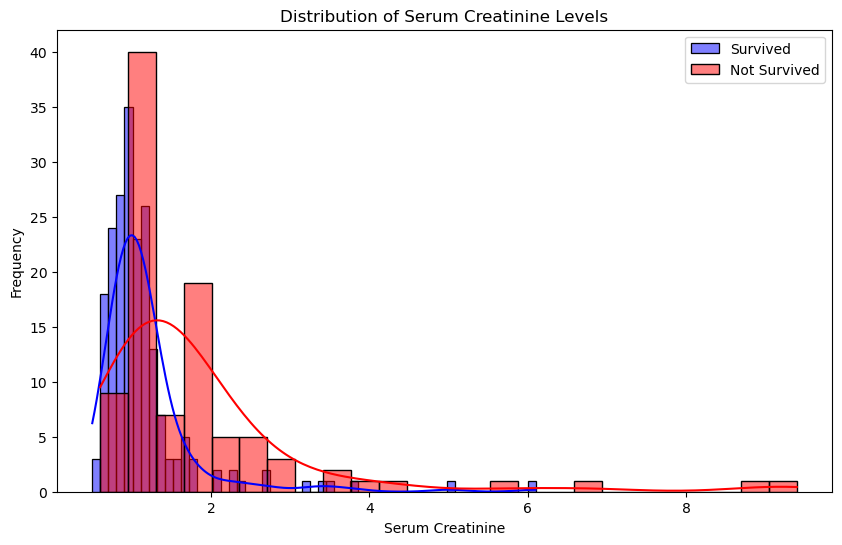

In [29]:
##How does the serum creatinine level vary between patients who survived and those who did not ?
serum_creatinine_survived = df[df['DEATH_EVENT']==0]['serum_creatinine']
serum_creatinine_not_survived = df[df['DEATH_EVENT']==1]['serum_creatinine']


from scipy.stats import ttest_ind
t_statistic,p_value = ttest_ind(serum_creatinine_survived,serum_creatinine_not_survived)
print("Mean serum creatinine (Survived):",serum_creatinine_survived.mean())
print("Mean Serum Creatinine (Not Survived):", serum_creatinine_not_survived.mean())
print("T-statistic:", t_statistic)
print("P-value:", p_value)

plt.figure(figsize=(10, 6))
sns.histplot(serum_creatinine_survived, color='blue', kde=True, label='Survived', alpha=0.5)
sns.histplot(serum_creatinine_not_survived, color='red', kde=True, label='Not Survived', alpha=0.5)
plt.title('Distribution of Serum Creatinine Levels')
plt.xlabel('Serum Creatinine')
plt.ylabel('Frequency')
plt.legend()
plt.show()